# Groupby_on_DataFrames

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [6]:
dframe = DataFrame({'k1':['X','X','Y','Y','Z'],
                   'k2':['alpha','beta','alpha','beta','alpha'],
                   'dataset1':np.random.randn(5),
                   'dataset2':np.random.randn(5)})
dframe

,dataset1,dataset2,k1,k2
0,-0.857922,-0.920560,X,alpha
1,0.675020,0.027208,X,beta
2,0.527491,-0.852662,Y,alpha
3,-2.024299,-0.013708,Y,beta
4,-0.609434,1.001822,Z,alpha


In [7]:
group1 = dframe['dataset1'].groupby(dframe['k1'])

In [8]:
group1

In [9]:
group1.mean()

k1
X   -0.091451
Y   -0.748404
Z   -0.609434
Name: dataset1, dtype: float64

In [11]:
cities = np.array(['NY','LA','LA','NY','NY'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])

In [12]:
dframe['dataset1'].groupby([cities,month]).mean()

LA  FEB    0.675020
    JAN    0.527491
NY  FEB   -2.024299
    JAN   -0.733678
Name: dataset1, dtype: float64

In [13]:
dframe

,dataset1,dataset2,k1,k2
0,-0.857922,-0.920560,X,alpha
1,0.675020,0.027208,X,beta
2,0.527491,-0.852662,Y,alpha
3,-2.024299,-0.013708,Y,beta
4,-0.609434,1.001822,Z,alpha


In [14]:
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,-0.091451,-0.446676
Y,-0.748404,-0.433185
Z,-0.609434,1.001822


In [15]:
dframe.groupby(['k1','k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha -0.857922 -0.920560
   beta   0.675020  0.027208
Y  alpha  0.527491 -0.852662
   beta  -2.024299 -0.013708
Z  alpha -0.609434  1.001822

In [16]:
dframe.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [18]:
for name, group in dframe.groupby('k1'):
    print('This is the  %s group' % name)
    print(group)
    print('\n')

This is the  X group
   dataset1  dataset2 k1     k2
0 -0.857922 -0.920560  X  alpha
1  0.675020  0.027208  X   beta


This is the  Y group
   dataset1  dataset2 k1     k2
2  0.527491 -0.852662  Y  alpha
3 -2.024299 -0.013708  Y   beta


This is the  Z group
   dataset1  dataset2 k1     k2
4 -0.609434  1.001822  Z  alpha




In [21]:
for (k1,k2), group in dframe.groupby(['k1','k2']):
    print("Key1 = %s Key2 = %s" %(k1,k2))
    print(group)
    print('\n')

Key1 = X Key2 = alpha
   dataset1  dataset2 k1     k2
0 -0.857922  -0.92056  X  alpha


Key1 = X Key2 = beta
   dataset1  dataset2 k1    k2
1   0.67502  0.027208  X  beta


Key1 = Y Key2 = alpha
   dataset1  dataset2 k1     k2
2  0.527491 -0.852662  Y  alpha


Key1 = Y Key2 = beta
   dataset1  dataset2 k1    k2
3 -2.024299 -0.013708  Y  beta


Key1 = Z Key2 = alpha
   dataset1  dataset2 k1     k2
4 -0.609434  1.001822  Z  alpha




In [22]:
group_dict = dict(list(dframe.groupby('k1')))

In [23]:
group_dict['X']

,dataset1,dataset2,k1,k2
0,-0.857922,-0.920560,X,alpha
1,0.675020,0.027208,X,beta


In [24]:
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes,axis=1)))

In [26]:
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0 -0.857922 -0.920560
 1  0.675020  0.027208
 2  0.527491 -0.852662
 3 -2.024299 -0.013708
 4 -0.609434  1.001822, dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [27]:
dataset2_group = dframe.groupby(['k1','k2'])[['dataset2']]
dataset2_group.mean()

dataset2
k1 k2             
X  alpha -0.920560
   beta   0.027208
Y  alpha -0.852662
   beta  -0.013708
Z  alpha  1.001822

# GroupBy_on_Dict_and_Series

In [28]:
animals = DataFrame(np.arange(16).reshape(4,4),
                   columns = ['W','X','Y','Z'],
                   index = ['Dog','Cat','Bird','Mouse'])
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [30]:
animals.loc[1:2,['W','Y']] = np.nan

In [31]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [32]:
behavior_map = {'W':'good','X':'bad','Y':'good','Z':'bad'}

In [33]:
animal_col= animals.groupby(behavior_map,axis=1)
animal_col.sum()

,bad,good
Dog,4.0,2.0
Cat,12.0,NaN
Bird,20.0,18.0
Mouse,28.0,26.0


In [34]:
behav_series = Series(behavior_map)
behav_series

W    good
X     bad
Y    good
Z     bad
dtype: object

In [35]:
animals.groupby(behav_series,axis=1).count()

,bad,good
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2


In [37]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [38]:
animals.groupby(len).sum()

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


In [39]:
keys = ['A','B','A','B']

In [40]:
animals.groupby([len,keys]).max()

W   X     Y   Z
3 A   0.0   1   2.0   3
  B   NaN   5   NaN   7
4 A   8.0   9  10.0  11
5 B  12.0  13  14.0  15

In [41]:
hier_col = pd.MultiIndex.from_arrays([['NY','NY','NY','SF','SF'],[1,2,3,1,2]],names=['City','sub_value'])

In [42]:
dframe_hr = DataFrame(np.arange(25).reshape(5,5),columns=hier_col)

In [43]:
dframe_hr = dframe_hr * 100

In [44]:
dframe_hr

City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

# Data_Aggregation

In [45]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [47]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

In [49]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
dframe_wine['alcohol'].mean()

10.422983114446502

In [51]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [52]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [53]:
wino = dframe_wine.groupby('quality')

In [55]:
wino.describe()

alcohol                                                          \
          count       mean       std  min     25%     50%     75%   max   
quality                                                                   
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0   
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1   
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9   
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0   
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0   
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0   

        chlorides            ...   total sulfur dioxide         \
            count      mean  ...                    75%    max   
quality                      ...                                 
3            10.0  0.122500  ...                   42.5   49.0   
4            53.0  0.090679  ...                   49.0  119.0   
5           681.0  0.092736  ...                   84.0  155.0   
6           638.0  0.084956  ...                   54.0  165.0   
7           199.0  0.076588  ...                   43.0  289.0   
8            18.0  0.068444  ...                   43.0   88.0   

        volatile acidity                                                   \
                   count      mean       std   min     25%    50%     75%   
quality                                                                     
3                   10.0  0.884500  0.331256  0.44  0.6475  0.845  1.0100   
4                   53.0  0.693962  0.220110  0.23  0.5300  0.670  0.8700   
5                  681.0  0.577041  0.164801  0.18  0.4600  0.580  0.6700   
6                  638.0  0.497484  0.160962  0.16  0.3800  0.490  0.6000   
7                  199.0  0.403920  0.145224  0.12  0.3000  0.370  0.4850   
8                   18.0  0.423333  0.144914  0.26  0.3350  0.370  0.4725   

                
           max  
quality         
3        1.580  
4        1.130  
5        1.330  
6        1.040  
7        0.915  
8        0.850  

[6 rows x 88 columns]

In [56]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [57]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [58]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
dframe_wine['qual/alc ratio'] = dframe_wine['quality']/ dframe_wine['alcohol']

In [60]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [61]:
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [62]:
%matplotlib inline

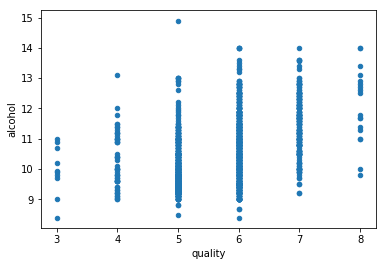

In [63]:
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

# Splitting_Applying_Combining

In [65]:
def ranker(df):
    df['alc_content_rank']= np.arange(len(df))+1
    return df

In [67]:
dframe_wine.sort_values('alcohol',ascending=False,inplace=True)

In [68]:
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [69]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,0.428571,3


In [71]:
num_of_qual = dframe_wine['quality'].value_counts()

In [72]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [74]:
dframe_wine[dframe_wine.alc_content_rank == 1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0.272727,1


# Cross_Tabulation

In [77]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [78]:
data ="""\
Sample   Animal   Intelligence
1        Dog     Smart
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart"""

#Store as dframe
dframe = pd.read_table(StringIO(data),sep='\s+')

In [79]:
dframe

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [80]:
pd.crosstab(dframe.Animal,dframe.Intelligence,margins=True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6
